In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
datos = np.loadtxt('data.csv', delimiter=',')
x = datos[:,0]
y = datos[:,1]

In [18]:
theta_1 = 10     # initial values of   
theta_0 = 10     # y=theta_1*x + theta_0  
alpha = 0.0001   # The learning Rate  
epochs = 100     # The number of iterations
MSE = []
MAE = []
MAPE = []

def func(x_, a1, a0):
    return a1 * x_ + a0

# Ajuste usando curve_fit
popt, pcov = curve_fit(func, x, y, [theta_1, theta_0], method='lm')

for i in range(epochs):
  hx = theta_1*x + theta_0

  d_theta0 = np.mean(hx - y)
  d_theta1 = np.mean((hx - y)*x)
  theta_0 = theta_0 - alpha*d_theta0 # Actualizacion de los parametros
  theta_1 = theta_1 - alpha*d_theta1

  MSE.append(np.mean((hx - y)**2))
  MAE.append(np.mean(abs(hx - y)))
  MAPE.append(100*np.mean(abs((y - hx)/y)))

hx = theta_1*x + theta_0
iteraciones = np.linspace(1,100,100)

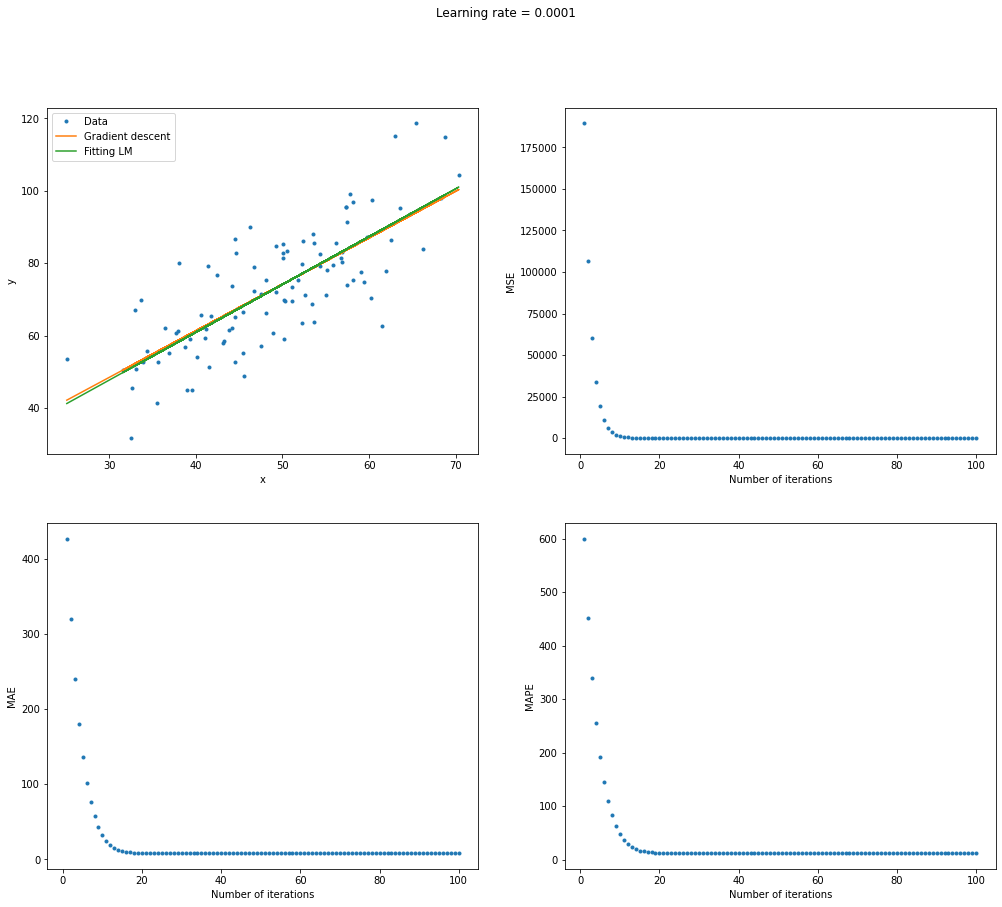

In [19]:
plt.figure(figsize=(17,14))
plt.suptitle('Learning rate = {}'.format(alpha))
plt.subplot(221)
plt.plot(x,y,'.', label='Data')
plt.plot(x,hx, label='Gradient descent')
plt.plot(x, func(x, popt[0], popt[1]), label='Fitting LM')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(222)
plt.plot(iteraciones,MSE,'.')
plt.xlabel('Number of iterations')
plt.ylabel('MSE')

plt.subplot(223)
plt.plot(iteraciones,MAE,'.')
plt.xlabel('Number of iterations')
plt.ylabel('MAE')

plt.subplot(224)
plt.plot(iteraciones,MAPE,'.')
plt.xlabel('Number of iterations')
plt.ylabel('MAPE')

plt.show()

¿Qué ocurre si aumentamos un poco el valor del *learning rate*?

In [20]:
theta_1 = 10     # initial values of   
theta_0 = 10     # y=theta_1*x + theta_0  
alpha = 0.0007   # The learning Rate  
epochs = 100     # The number of iterations
MSE = []
MAE = []
MAPE = []

for i in range(epochs):
  hx = theta_1*x + theta_0

  d_theta0 = np.mean(hx - y)
  d_theta1 = np.mean((hx - y)*x)
  theta_0 = theta_0 - alpha*d_theta0 # Actualizacion de los parametros
  theta_1 = theta_1 - alpha*d_theta1

  MSE.append(np.mean((hx - y)**2))
  MAE.append(np.mean(abs(hx - y)))
  MAPE.append(100*np.mean(abs((y - hx)/y)))

hx = theta_1*x + theta_0
iteraciones = np.linspace(1,100,100)

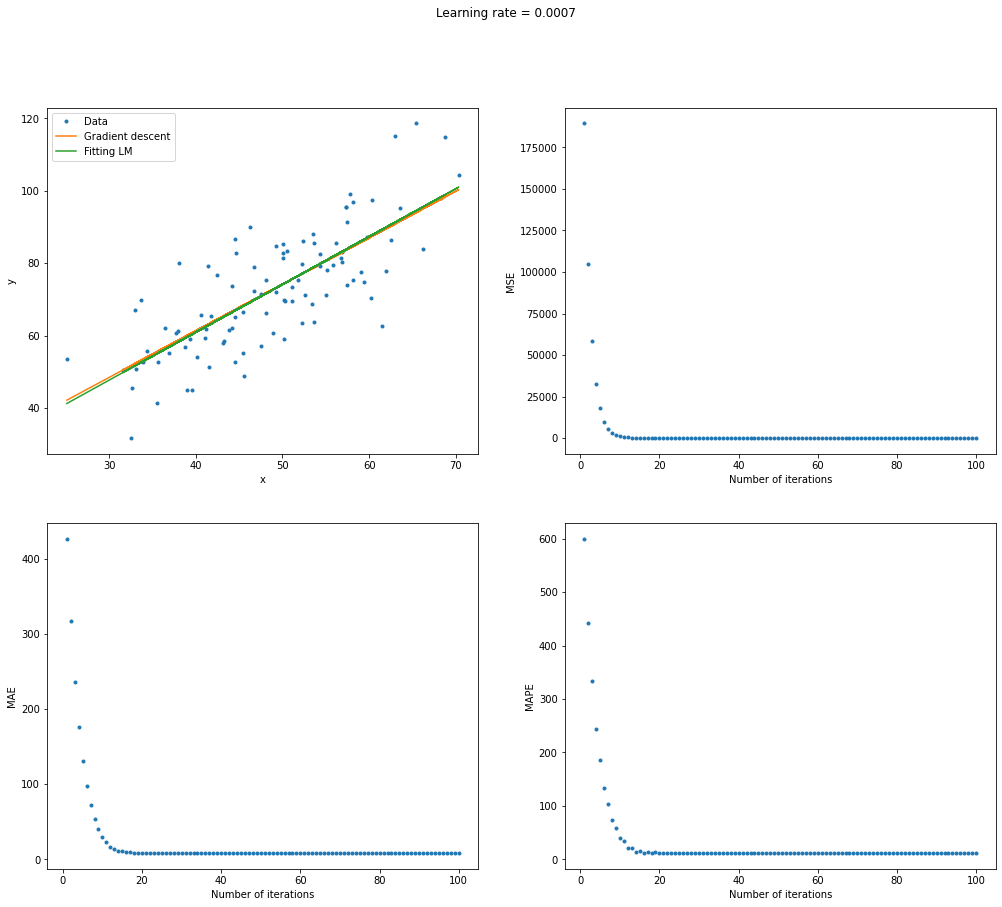

In [21]:
plt.figure(figsize=(17,14))
plt.suptitle('Learning rate = {}'.format(alpha))
plt.subplot(221)
plt.plot(x,y,'.', label='Data')
plt.plot(x,hx, label='Gradient descent')
plt.plot(x, func(x, popt[0], popt[1]), label='Fitting LM')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(222)
plt.plot(iteraciones,MSE,'.')
plt.xlabel('Number of iterations')
plt.ylabel('MSE')

plt.subplot(223)
plt.plot(iteraciones,MAE,'.')
plt.xlabel('Number of iterations')
plt.ylabel('MAE')

plt.subplot(224)
plt.plot(iteraciones,MAPE,'.')
plt.xlabel('Number of iterations')
plt.ylabel('MAPE')

plt.show()

La diferencia prácticamente no se nota. Intentemos con un valor más para lograr algo diferente.

In [26]:
theta_1 = 10     # initial values of   
theta_0 = 10     # y=theta_1*x + theta_0  
alpha = 0.0009   # The learning Rate  
epochs = 100     # The number of iterations
MSE = []
MAE = []
MAPE = []

for i in range(epochs):
  hx = theta_1*x + theta_0

  d_theta0 = np.mean(hx - y)
  d_theta1 = np.mean((hx - y)*x)
  theta_0 = theta_0 - alpha*d_theta0 # Actualizacion de los parametros
  theta_1 = theta_1 - alpha*d_theta1

  MSE.append(np.mean((hx - y)**2))
  MAE.append(np.mean(abs(hx - y)))
  MAPE.append(100*np.mean(abs((y - hx)/y)))

hx = theta_1*x + theta_0
iteraciones = np.linspace(1,100,100)

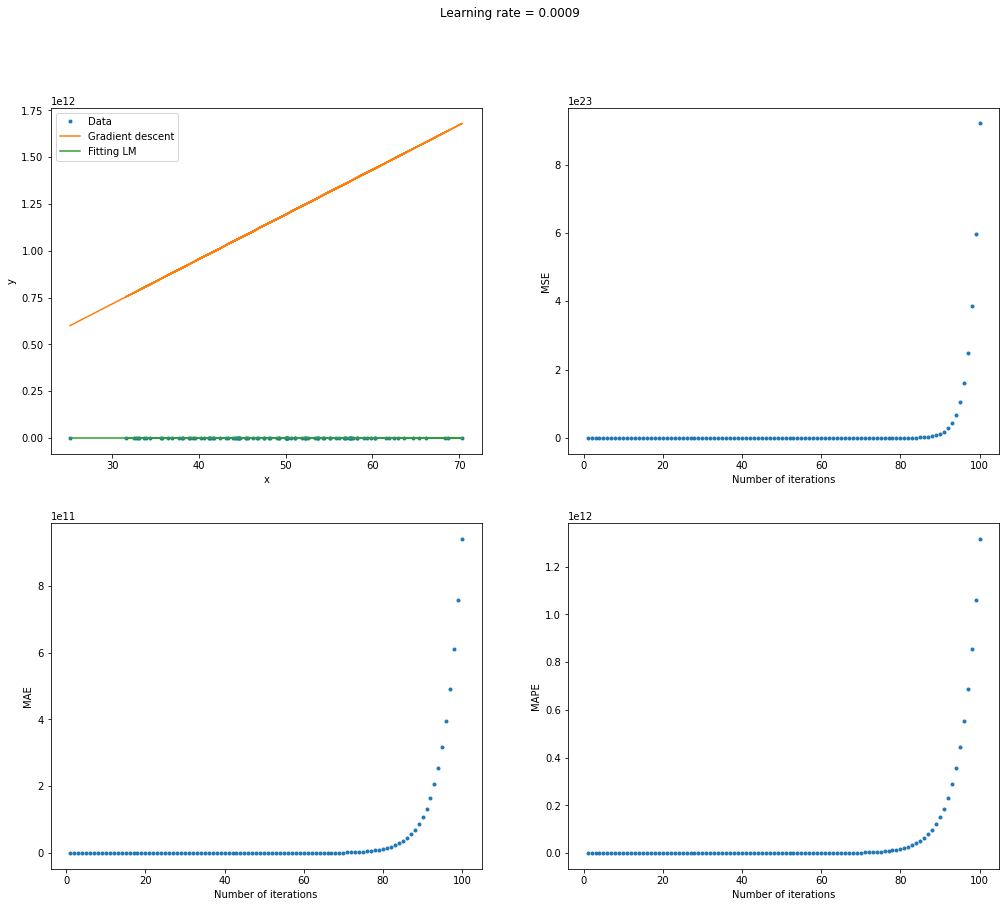

In [27]:
plt.figure(figsize=(17,14))
plt.suptitle('Learning rate = {}'.format(alpha))
plt.subplot(221)
plt.plot(x,y,'.', label='Data')
plt.plot(x,hx, label='Gradient descent')
plt.plot(x, func(x, popt[0], popt[1]), label='Fitting LM')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(222)
plt.plot(iteraciones,MSE,'.')
plt.xlabel('Number of iterations')
plt.ylabel('MSE')

plt.subplot(223)
plt.plot(iteraciones,MAE,'.')
plt.xlabel('Number of iterations')
plt.ylabel('MAE')

plt.subplot(224)
plt.plot(iteraciones,MAPE,'.')
plt.xlabel('Number of iterations')
plt.ylabel('MAPE')

plt.show()

Ahora el *learning rate* no es lo suficientemente pequeño para que el algoritmo vaya descendiendo al mínimo de la función. Más bien parece que en alguna iteración el algoritmo se pasó mucho del mínimo y se fue alejando, debido al alto *learning rate*, y por esto los errores crecientes al final.